In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [2]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[:, [3, 4]].values

In [6]:
X[:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

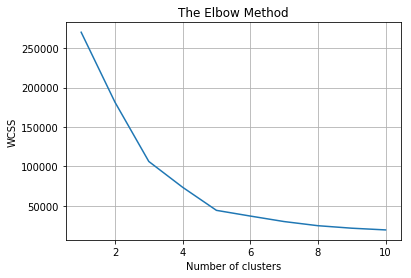

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [12]:
dataset['y'] = y_kmeans

In [14]:
dataset.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


In [22]:
X[y_kmeans == 89, :]

array([], shape=(0, 2), dtype=int64)

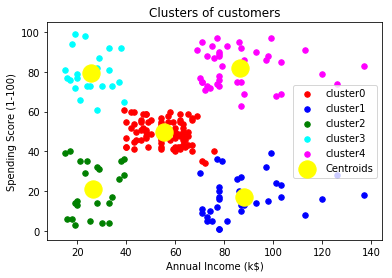

In [30]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'cluster0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'cluster1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'cluster2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'cluster3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'cluster4')
# visualize centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [29]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [54]:
cluster4 = X[y_kmeans == 4, ]
mean4 = kmeans.cluster_centers_[4]

In [55]:
mean4

array([86.53846154, 82.12820513])

In [56]:
len(cluster0)

81

In [78]:
def distance(v1, v2):
    dif = v1-v2
    return np.sqrt(dif.dot(dif.T))

def findAnomaly(clusterid = 4, k = 1):
    cluster4 = X[y_kmeans == clusterid, ]
    mean4 = kmeans.cluster_centers_[clusterid]
    
    dist4 = []
    for i in range(len(cluster4)):
        dist4.append(distance(mean4, cluster4[i]))
    dist4 = np.array(dist4) 
    
    return cluster4[dist4.argsort()[-k:]]

In [58]:
v1 = np.array([3,4])
v2 = np.array([0,0])
distance(v1, v2)

5.0

In [63]:
max(dist4)

50.46906864807208

In [64]:
np.argmax(dist4)

38

In [66]:
dist4[38]

50.46906864807208

In [67]:
cluster4[np.argmax(dist4)]

array([137,  83])

In [69]:
findAnomaly(clusterid = 4)

array([137,  83])

In [79]:
findAnomaly(clusterid = 1)

array([[137,  18]])

In [80]:
findAnomaly(clusterid = 1, k=2)

array([[126,  28],
       [137,  18]])

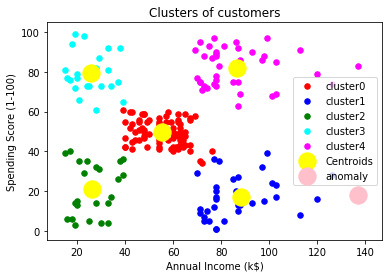

In [84]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'cluster0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'cluster1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'cluster2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'cluster3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'cluster4')
# visualize centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
anomaly = findAnomaly(clusterid = 1, k=1)
plt.scatter(anomaly[:, 0], anomaly[:, 1],s = 300, c = 'pink', label = 'anomaly')




plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

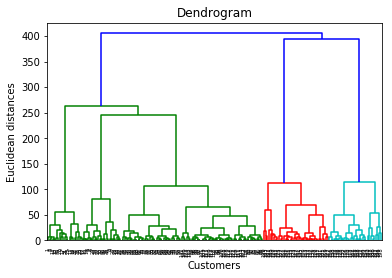

In [85]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

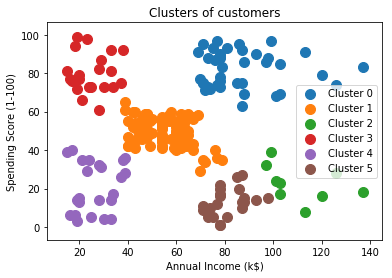

In [98]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
k = 6
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters

for i in range(k):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s = 100, label = 'Cluster {}'.format(i))



plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc ='best')
plt.show()